Get dataset files.

In [1]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip -O /tmp/rockpaperscissors.zip

--2020-05-20 15:03:52--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  16.7MB/s    in 17s     

2020-05-20 15:04:09 (17.9 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



Extract rockpaperscissors dataset.

In [0]:
from zipfile import ZipFile
import os

local_zip = '/tmp/rockpaperscissors.zip'

zip_file = ZipFile(local_zip, 'r')
zip_file.extractall('/tmp')
zip_file.close()

Add all image data label to list.

In [0]:
from sklearn.model_selection import train_test_split

data_path = '/tmp/rockpaperscissors'

X = []
y = []

for label in os.listdir(data_path):
    if label == "README_rpc-cv-images.txt" or label == "rps-cv-images":
      continue
      
    for item in os.listdir(os.path.join(data_path, label)):
        X.append(os.path.join(data_path, label, item))
        y.append(label)

Split dataset to train set and validation set.

In [0]:
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

training_set = pd.DataFrame({'y': y_train, 'X': X_train})
validation_set = pd.DataFrame({'y': y_validation, 'X': X_validation})

Augmentasi gambar.

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

Image data generator.

In [19]:
train_generator = train_datagen.flow_from_dataframe(
    training_set,
    x_col='X',
    y_col='y',
    target_size=(150,150),
    batch_size=4,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_dataframe(
    validation_set,
    x_col='X',
    y_col='y',
    target_size=(150,150),
    batch_size=4,
    class_mode='categorical'
)

Found 1312 validated image filenames belonging to 3 classes.
Found 438 validated image filenames belonging to 3 classes.


Learning.

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2)

Epoch 1/20
25/25 - 6s - loss: 1.1143 - accuracy: 0.2700 - val_loss: 1.0948 - val_accuracy: 0.3500
Epoch 2/20
25/25 - 6s - loss: 1.0979 - accuracy: 0.4000 - val_loss: 1.1106 - val_accuracy: 0.3000
Epoch 3/20
25/25 - 6s - loss: 1.0900 - accuracy: 0.3300 - val_loss: 1.1120 - val_accuracy: 0.2500
Epoch 4/20
25/25 - 6s - loss: 1.0953 - accuracy: 0.4100 - val_loss: 1.0544 - val_accuracy: 0.4000
Epoch 5/20
25/25 - 6s - loss: 1.0135 - accuracy: 0.5200 - val_loss: 0.9351 - val_accuracy: 0.6000
Epoch 6/20
25/25 - 6s - loss: 0.7116 - accuracy: 0.7000 - val_loss: 0.9173 - val_accuracy: 0.7000
Epoch 7/20
25/25 - 6s - loss: 0.5674 - accuracy: 0.7600 - val_loss: 0.5667 - val_accuracy: 0.7500
Epoch 8/20
25/25 - 6s - loss: 0.3867 - accuracy: 0.9100 - val_loss: 0.5951 - val_accuracy: 0.8000
Epoch 9/20
25/25 - 6s - loss: 0.3041 - accuracy: 0.9100 - val_loss: 0.1864 - val_accuracy: 0.9500
Epoch 10/20
25/25 - 6s - loss: 0.5161 - accuracy: 0.7900 - val_loss: 0.3144 - val_accuracy: 0.9000
Epoch 11/20
25/25 -

Predicting.

Saving data-original4.png to data-original4 (1).png
data-original4.png
Rock


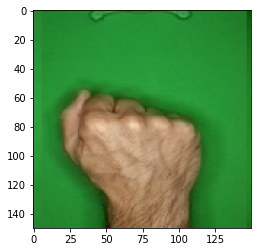

In [49]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][2] == 1:
    print('Paper')
  elif classes[0][0] == 1:
    print('Rock')
  elif classes[0][1] == 1:
    print('Scissor')